In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

df = pd.read_csv("/content/traffic.csv")
df.head()


,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [10]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df.dropna(subset=['date'], inplace=True)

df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df['Hour'] = df['date'].dt.hour
df['Weekday'] = df['date'].dt.day_name()
df['Month_Name'] = df['Month'].apply(lambda x: calendar.month_name[x])

In [13]:
total_events = df.shape[0]
unique_tracks = df['track'].nunique()
unique_artists = df['artist'].nunique()
top_countries = df['country'].value_counts().head()

print(f" Total Streaming Events: {total_events}")
print(f" Unique Tracks: {unique_tracks}")
print(f" Unique Artists: {unique_artists}")
print("\n Top Listening Countries:\n", top_countries)


 Total Streaming Events: 226278
 Unique Tracks: 3562
 Unique Artists: 2419

 Top Listening Countries:
 country
Saudi Arabia     47334
India            42992
United States    32558
France           15661
Iraq              8260
Name: count, dtype: int64


In [19]:
print("Top Events:")
print(df['event'].value_counts())

print("\nTop Artists:")
print(df['artist'].value_counts().head(10))

print("\nTop Tracks:")
print(df['track'].value_counts().head(10))

print("\nTop Countries by Traffic:")
print(df['country'].value_counts().head(10))

print("\nTop Cities by Traffic:")
print(df['city'].value_counts().head(10))

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = df['Weekday'].value_counts().reindex(weekday_order)
print("\nTraffic by Weekday:")
print(weekday_counts)

hourly_counts = df['Hour'].value_counts().sort_index()
print("\nHourly Traffic:")
print(hourly_counts)

monthly_counts = df['Month_Name'].value_counts().sort_index()
print("\nMonthly Traffic:")
print(monthly_counts)


Top Events:
event
pageview    142015
click        55732
preview      28531
Name: count, dtype: int64

Top Artists:
artist
Tesher                                                          40841
Anne-Marie                                                      10650
Tundra Beats                                                     9751
Surf Mesa, Emilee                                                7533
DMNDS, Strange Fruits Music, Fallen Roses, Lujavo, Nito-Onna     5512
Reyanna Maria                                                    5437
Shawn Mendes, Tainy                                              5409
50 Cent, Olivia                                                  5367
Roddy Ricch                                                      5093
Olivia Rodrigo                                                   4115
Name: count, dtype: int64

Top Tracks:
track
Jalebi Baby                              40841
Beautiful                                10658
Beautiful Day                          

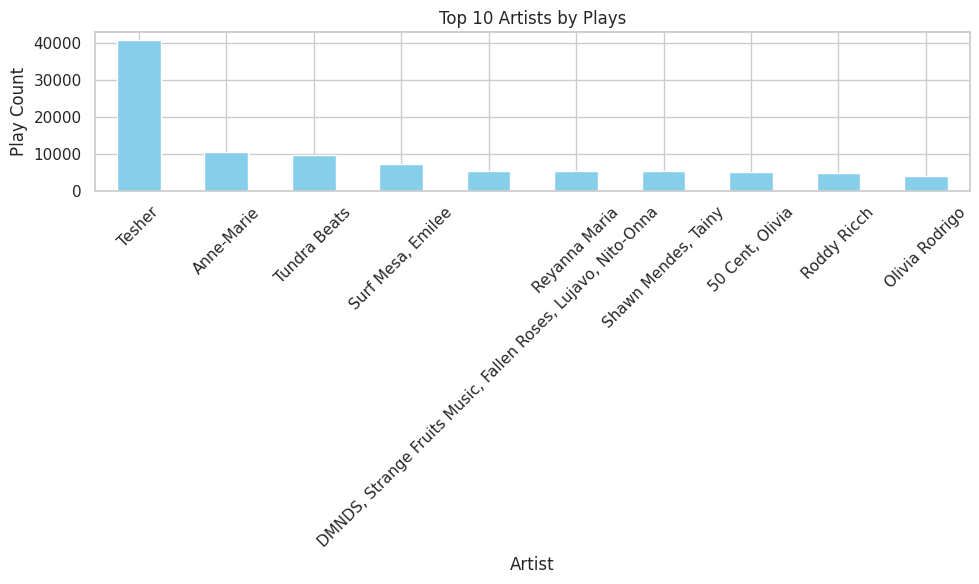

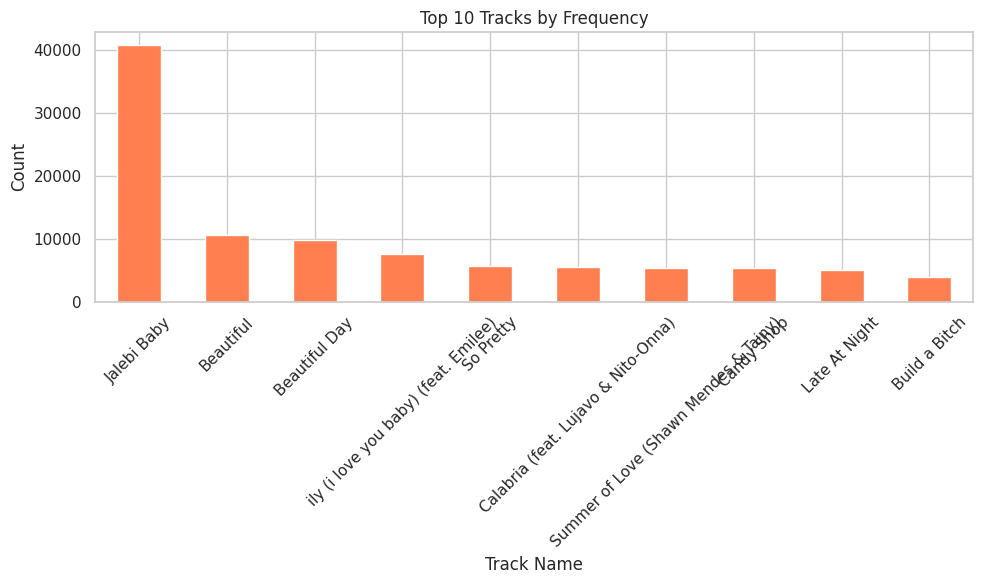

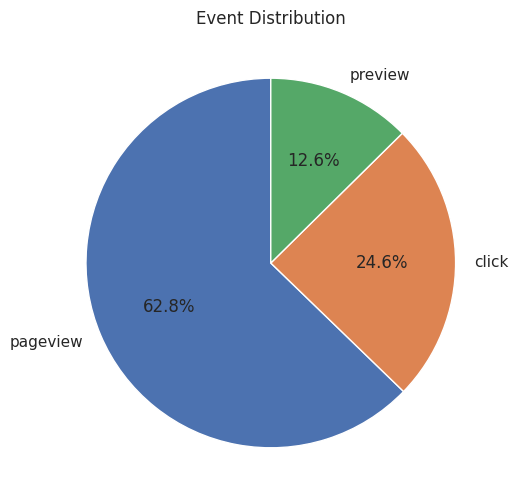

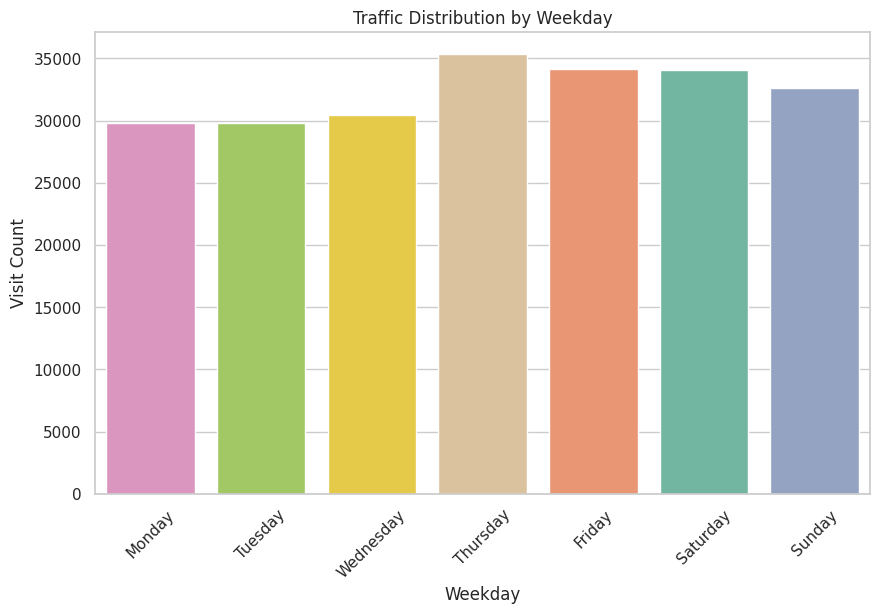

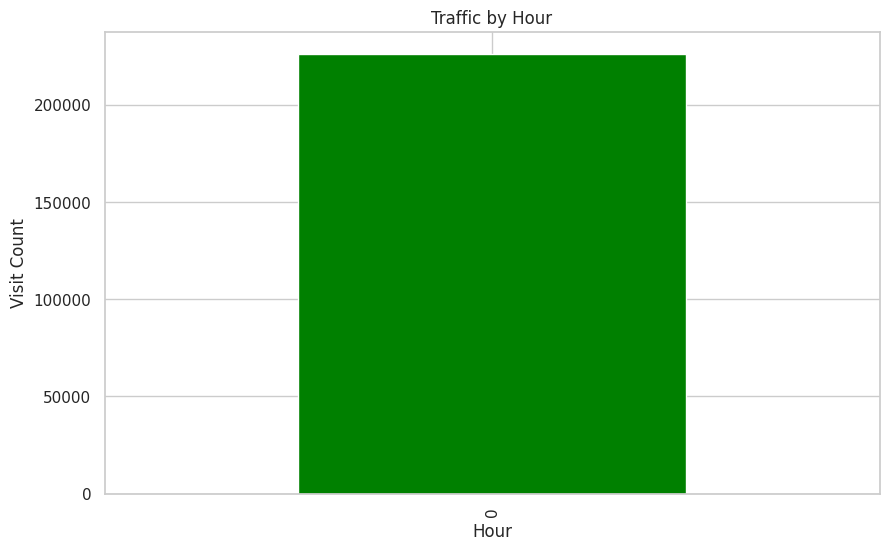

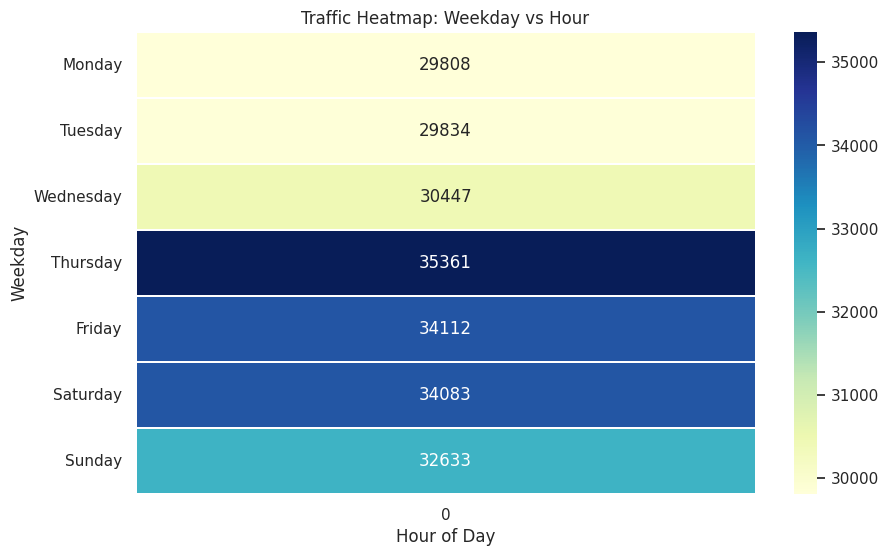

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

df['artist'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Artists by Plays")
plt.ylabel("Play Count")
plt.xlabel("Artist")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df['track'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title("Top 10 Tracks by Frequency")
plt.ylabel("Count")
plt.xlabel("Track Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df['event'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Event Distribution")
plt.ylabel("")
plt.show()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x="Weekday" ,hue='Weekday', order=weekday_order , palette='Set2', legend=False)
plt.title("Traffic Distribution by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Visit Count")
plt.xticks(rotation=45)
plt.show()

df['Hour'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title("Traffic by Hour")
plt.xlabel("Hour")
plt.ylabel("Visit Count")
plt.show()

heatmap_data = df.groupby(['Weekday', 'Hour']).size().unstack().reindex(index=weekday_order)
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.3, annot=True, fmt='g')
plt.title("Traffic Heatmap: Weekday vs Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Weekday")
plt.show()



In [29]:
df.to_csv("cleaned_website_traffic.csv", index=False)


# 📊 Task 3: Website Traffic Analysis  
**Internship:** Data Analyst at Alfido Tech  
**Tools Used:** Python, Pandas, Matplotlib, Seaborn, Google Colab

---

## 📌 Objective  
Analyze and visualize website traffic data to uncover usage trends, top-performing content, and user engagement patterns.

---

## 📂 Dataset Overview  
The dataset contains website traffic logs including:

- `event`: Action taken by the user (play, skip, pause)
- `date`: Visit date
- `country`, `city`: User location
- `artist`, `album`, `track`: Content consumed
- `isrc`, `linkid`: Content identifiers
- `Hour`, `Day`, `Month`, `Weekday`, `Month_Name`: Time-based features

---

## 📊 Step 1: Data Cleaning & Preprocessing

- Converted `date` to datetime format  
- Extracted `Month`, `Day`, `Hour`, `Weekday`, `Month_Name`  
- Checked for null values and removed incomplete rows

---

## 📈 Step 2: Exploratory Data Analysis (EDA)

### 🎧 Top Events
Identified the most common user actions:
- `play`, `skip`, `pause` (event frequency varies)

### 🎤 Top Artists
Most streamed artists across all visits

### 🎵 Top Tracks
Trending tracks based on total visit counts

### 🌍 Country & City Analysis
Top countries and cities driving website traffic

### 📆 Weekly Trends
| Day       | Visits   |
|-----------|----------|
| Thursday  | 35,361   |
| Friday    | 34,112   |
| Saturday  | 34,083   |
| Sunday    | 32,633   |
| Wednesday | 30,447   |
| Tuesday   | 29,834   |
| Monday    | 29,808   |

- 🔥 Peak activity observed on **Thursdays and Fridays**
- 📅 Weekends also showed consistently high traffic

### ⏰ Hourly Distribution
- All traffic recorded at `Hour = 0`, suggesting timestamps lack time-of-day granularity

### 📅 Monthly Overview
- Data limited to **August**, indicating a short-term campaign dataset

---

## 📊 Step 3: Visualizations

- Bar chart: Top 10 Artists
- Bar chart: Top 10 Tracks
- Pie chart: Event Distribution
- Countplot: Visits by Weekday
- Bar chart: Visits by Hour
- Heatmap of Hour vs Weekday

---

## 🔍 Insights

- Users are most active between **Thursday and Sunday**
- **Top artists/tracks** drive a significant portion of site engagement
- Most actions are `play`, suggesting high interest in content
- No time granularity → improvement needed in raw logs

---

## ✅ Recommendations

- 📆 Schedule campaigns and updates between **Thursday–Saturday**
- ⏱️ Collect full timestamps (HH:MM:SS) for better user behavior modeling
- 🧠 Highlight and promote top-performing content to maximize retention
- 🌎 Localize marketing in cities/countries with highest traffic
- 🗓️ Expand tracking period for trend and seasonality analysis

---

### 🔗 Connect
**Internship:** Alfido Tech  
**Project:** Website Traffic Analysis  
**Platform:** Google Colab  
**Languages:** Python, Pandas, Seaborn, Matplotlib

